* We want to find the best advertising method to increase the sales of a product.
* We have the data of the sales of the product in 200 different cities.
* The data is as follows:
* TV, Radio, Newspaper, Sales
* We will create a model to predict the sales based on the advertising method.


In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [2]:
df = pd.read_csv("data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<Axes: >

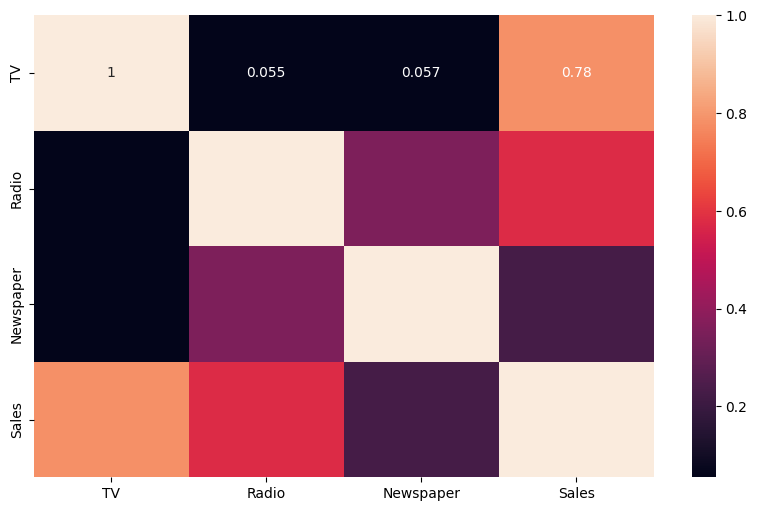

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)



In [6]:
X = df.drop('Sales', axis=1)
y = df.Sales

algo_test(X,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.838361e-01,7.142755e-01,6.110285e-01
XGBRegressor,9.724704e-01,9.321655e-01,7.258288e-01
KNeighborsRegressor,9.649616e-01,1.051635e+00,8.740821e-01
Extra Tree,9.596925e-01,1.127941e+00,8.725000e-01
Decision Tree,9.451663e-01,1.315580e+00,9.625000e-01
AdaBoost,9.106204e-01,1.679625e+00,1.189000e+00
Lasso,9.004013e-01,1.773046e+00,1.452202e+00
ElasticNet,8.999612e-01,1.776959e+00,1.456659e+00
Ridge,8.994381e-01,1.781599e+00,1.460766e+00
Linear,8.994380e-01,1.781600e+00,1.460757e+00


In [7]:

X1 = df[['TV']]
y1 = df.Sales
algo_test(X1,y1)



,R_Squared,RMSE,MAE
Gradient Boosting,7.059406e-01,3.046567e+00,2.320881e+00
AdaBoost,6.954624e-01,3.100371e+00,2.310000e+00
KNeighborsRegressor,6.768226e-01,3.193844e+00,2.511539e+00
Linear,6.766954e-01,3.194472e+00,2.444420e+00
Ridge,6.766953e-01,3.194473e+00,2.444421e+00
ElasticNet,6.765254e-01,3.195312e+00,2.446259e+00
Lasso,6.763679e-01,3.196090e+00,2.447934e+00
SVR,6.478772e-01,3.333806e+00,2.619841e+00
Decision Tree,6.239497e-01,3.445214e+00,2.705000e+00
Extra Tree,6.140490e-01,3.490272e+00,2.595000e+00


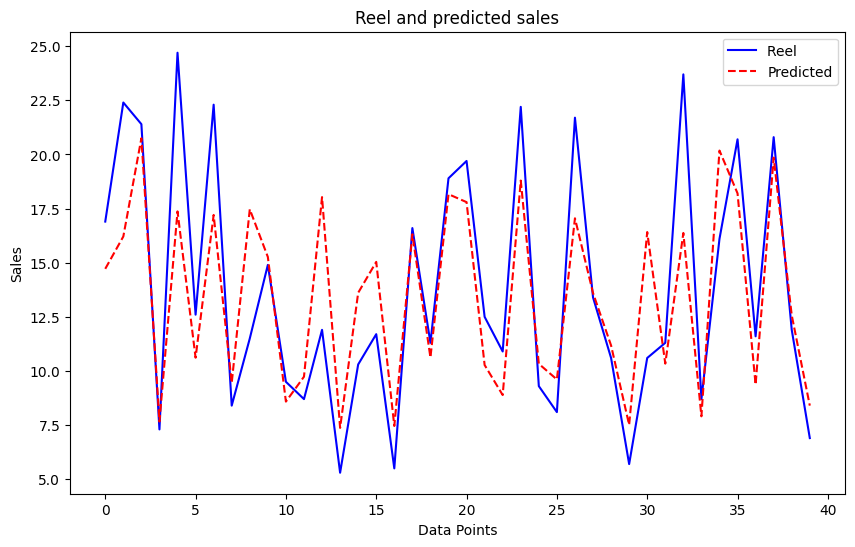

In [8]:
#line chart for test and prediction
x_train, x_test, y_train, y_test=train_test_split(X1,y1,test_size=.20,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Reel ', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Reel and predicted sales')
plt.legend()
plt.show()


In [9]:

X2 = df[['Radio']]
y2 = df.Sales
algo_test(X2,y2)


,R_Squared,RMSE,MAE
AdaBoost,0.283820,4.754495,3.509000
KNeighborsRegressor,0.280173,4.766583,3.463189
Lasso,0.263978,4.819906,3.936002
ElasticNet,0.263796,4.820503,3.933558
Ridge,0.263432,4.821695,3.929887
Linear,0.263431,4.821697,3.929879
SVR,0.171389,5.114093,4.040464
Gradient Boosting,0.139957,5.210186,3.828691
XGBRegressor,0.103954,5.318122,3.825073
Decision Tree,-0.100326,5.893238,4.340000


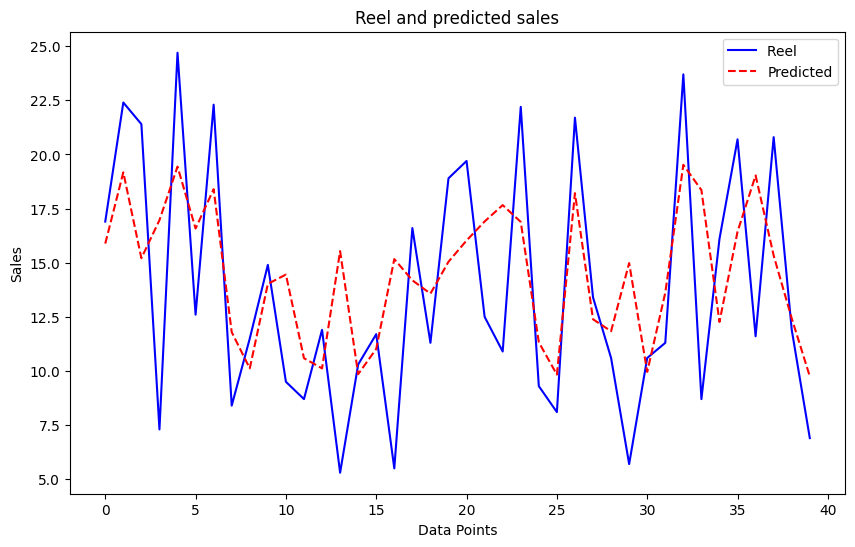

In [10]:
x_train, x_test, y_train, y_test=train_test_split(X2,y2,test_size=.20,random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Reel ', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Reel and predicted sales')
plt.legend()
plt.show()

In [11]:
X3 = df[['Newspaper']]
y3 = df.Sales
algo_test(X3,y3)


,R_Squared,RMSE,MAE
SVR,1.067738e-01,5.309748e+00,4.502723e+00
AdaBoost,6.838428e-02,5.422651e+00,4.637000e+00
KNeighborsRegressor,4.329423e-02,5.495186e+00,4.698243e+00
Lasso,3.163272e-02,5.528576e+00,4.788111e+00
ElasticNet,3.083725e-02,5.530846e+00,4.785325e+00
Ridge,2.987246e-02,5.533598e+00,4.782196e+00
Linear,2.987175e-02,5.533600e+00,4.782194e+00
Gradient Boosting,-2.472238e-01,6.274302e+00,5.100776e+00
XGBRegressor,-4.852403e-01,6.846862e+00,5.551375e+00
Decision Tree,-5.786617e-01,7.058912e+00,5.553333e+00


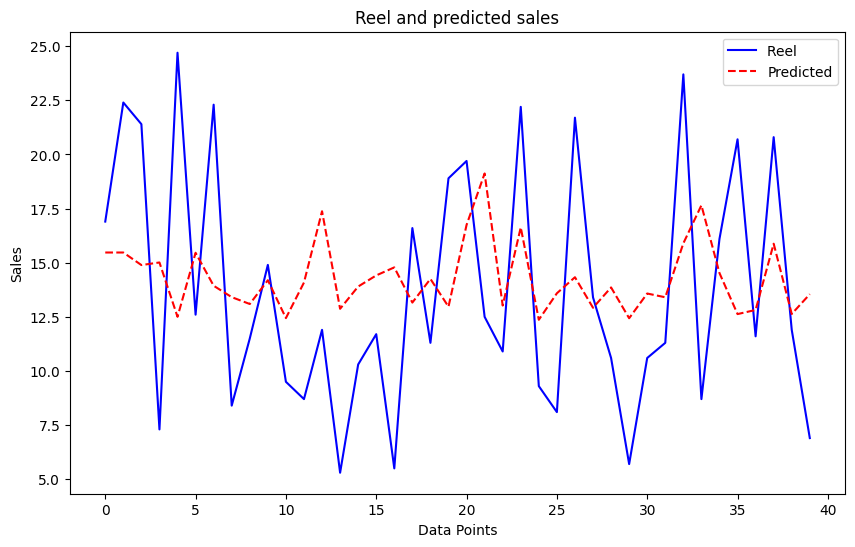

In [12]:
x_train, x_test, y_train, y_test=train_test_split(X3,y3,test_size=.20,random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Reel ', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Reel and predicted sales')
plt.legend()
plt.show()

### Linear model

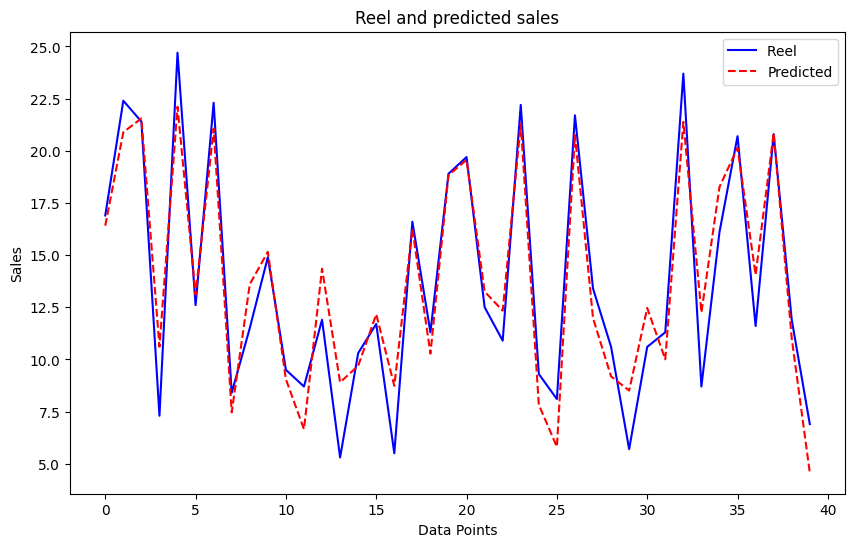

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Reel ', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Reel and predicted sales')
plt.legend()
plt.show()

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

In [14]:
print(coefficients)

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


* Coefficients for TV, Radio and Newspaper. 
* Radio is the most effective way to increase sales.
* Newspaper is the least effective way to increase sales.

<Figure size 1000x600 with 0 Axes>

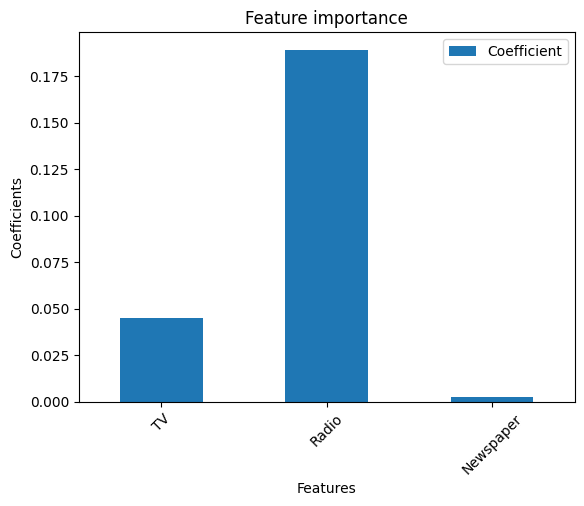

In [15]:
#Which feature is more important? (coefficients) bar chart
plt.figure(figsize=(10,6))
coefficients.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature importance')
plt.legend()
plt.xticks(rotation=45)
plt.show();

* Residuals

<Figure size 1000x600 with 0 Axes>

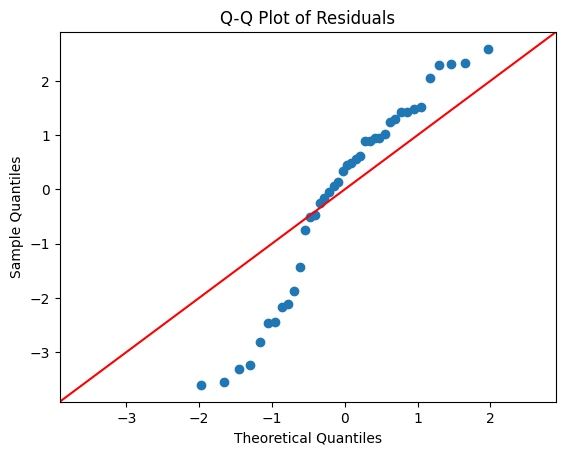

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show();

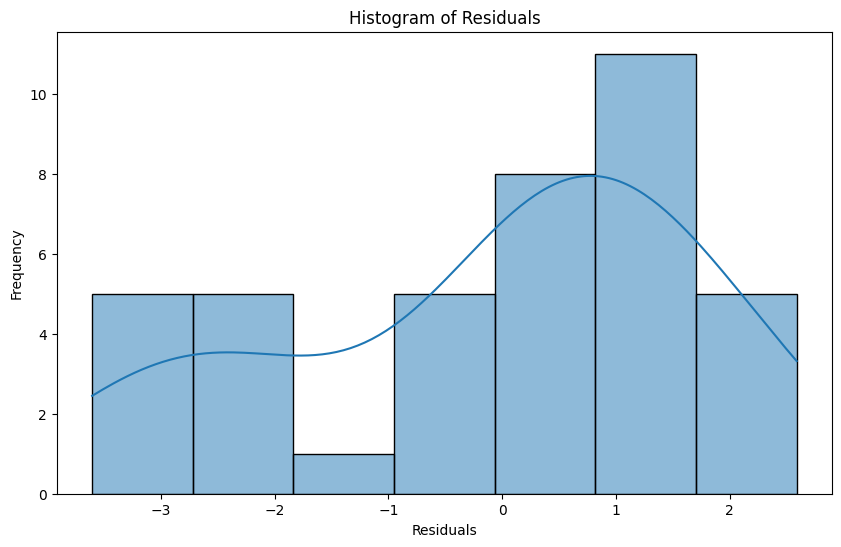

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

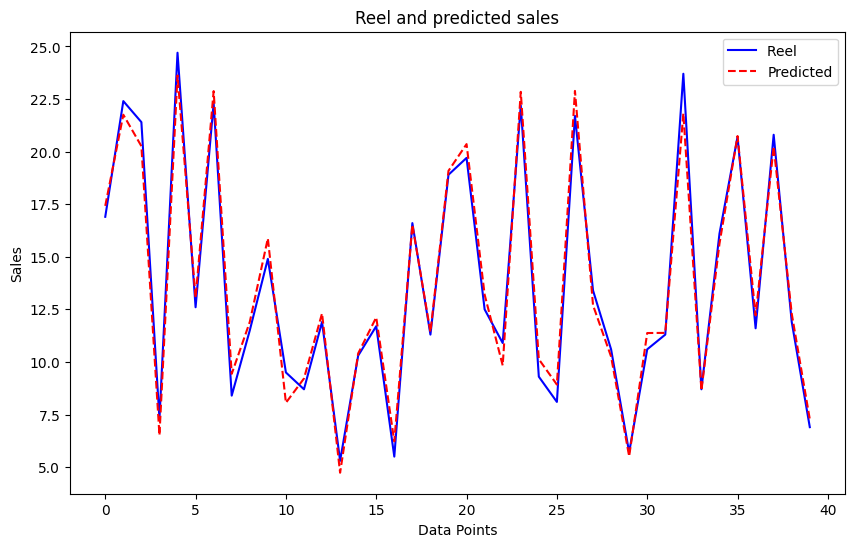

In [18]:
#best model is GradientBoostingRegressor. i'll try it.
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Reel ', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Reel and predicted sales')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

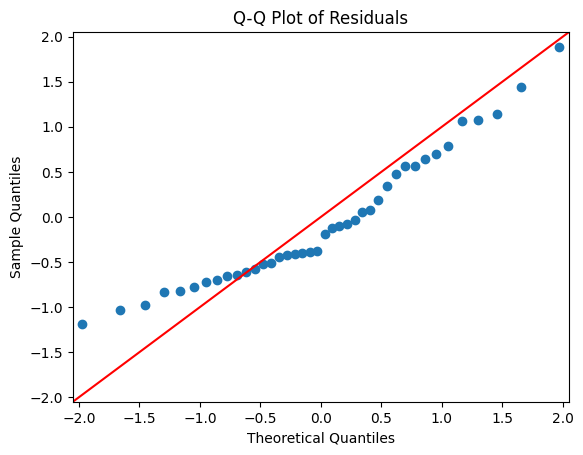

In [19]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

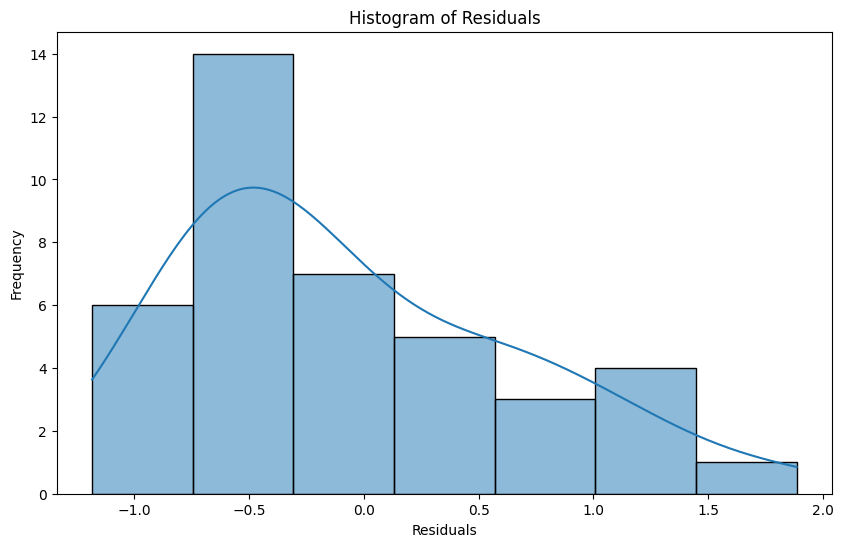

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()